In [186]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [3]:
df=pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [5]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26957,26958,2.09,Premium,H,SI2,60.6,59.0,8.27,8.22,5.00,17805
26958,26959,1.37,Premium,E,SI2,61.0,57.0,7.25,7.19,4.40,6751
26959,26960,1.05,Very Good,E,SI2,63.2,59.0,6.43,6.36,4.04,4281
26960,26961,1.10,Very Good,D,SI2,NaN,63.0,6.76,6.69,3.94,4361
26961,26962,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [6]:
df.shape

(26967, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [20]:
df = df.drop('Unnamed: 0', axis=1)

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


T` hev` bkth let`dkrjlea eif lkitjiukus fete, Gkr let`dkrjlea fete w` hev` lut, lkakur eif laerjty Gkr lkitjiukus fete w` hev` leret, f`pth, teba`, x. y, z eif prjl` _rjl` wjaa b` terd`t verjeba`.

In [23]:
dups=df.duplicated()
print('No. of duplicate rows=%d' %(dups.sum()))

No. of duplicate rows=34


In [24]:
df.describe(include='object').T

,count,unique,top,freq
cut,26967,5,Ideal,10816
color,26967,7,G,5661
clarity,26967,8,SI1,6571


In [25]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [26]:
df.shape

(26967, 10)

In [27]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

Observation-2: On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. There are three object data type 'cut', 'color' and 'clarity'.

Performing EDA : We will follow the below mentioned steps to perform EDA

Step 1 :Checking & Removing duplicates.
Step 2: Checking and treating Missing value.
Step 3: Outlier Treatment.
Step 4: Univariate Analysis.
Step 5: Bivariate Analysis.

In [28]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 33
(26958, 10)


In [31]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26958, 10)
After (26925, 10)


In [32]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


EDA-Step 2: Checking Missing value.

In [33]:
# Are there any missing values ?
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Observation-3:
we can observe there are 697 missing value in the depth column. Missing value treatment will be done in section 1.2.

EDA-Step 3 : Outlier Checks.

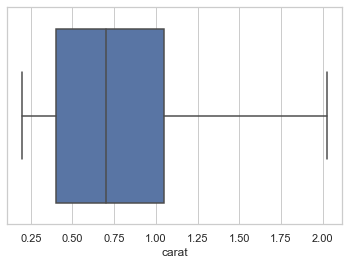

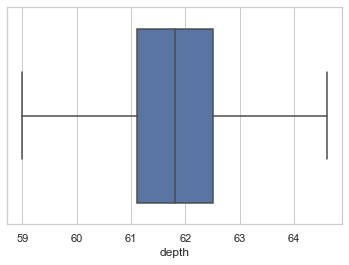

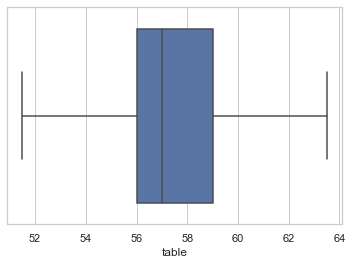

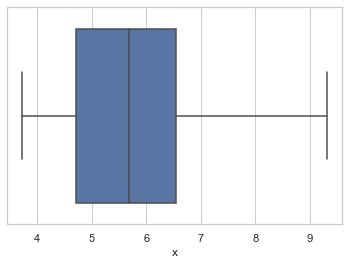

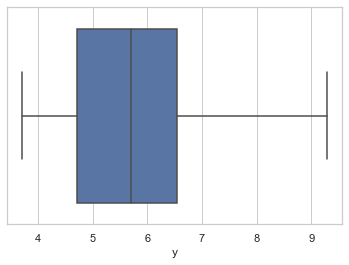

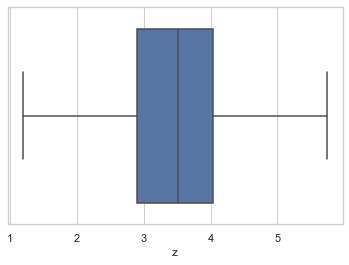

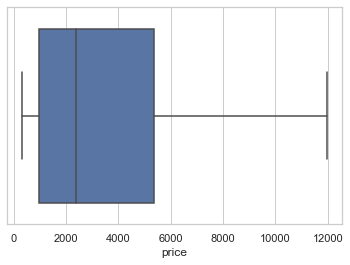

In [158]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [ ]:
### Outlier treatment :
def remove_outlier(cols):
    sorted(cols)
    Q1,Q3=np.percentile(cols,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
    cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

EDA-Step 4 : Univariate Analysis.

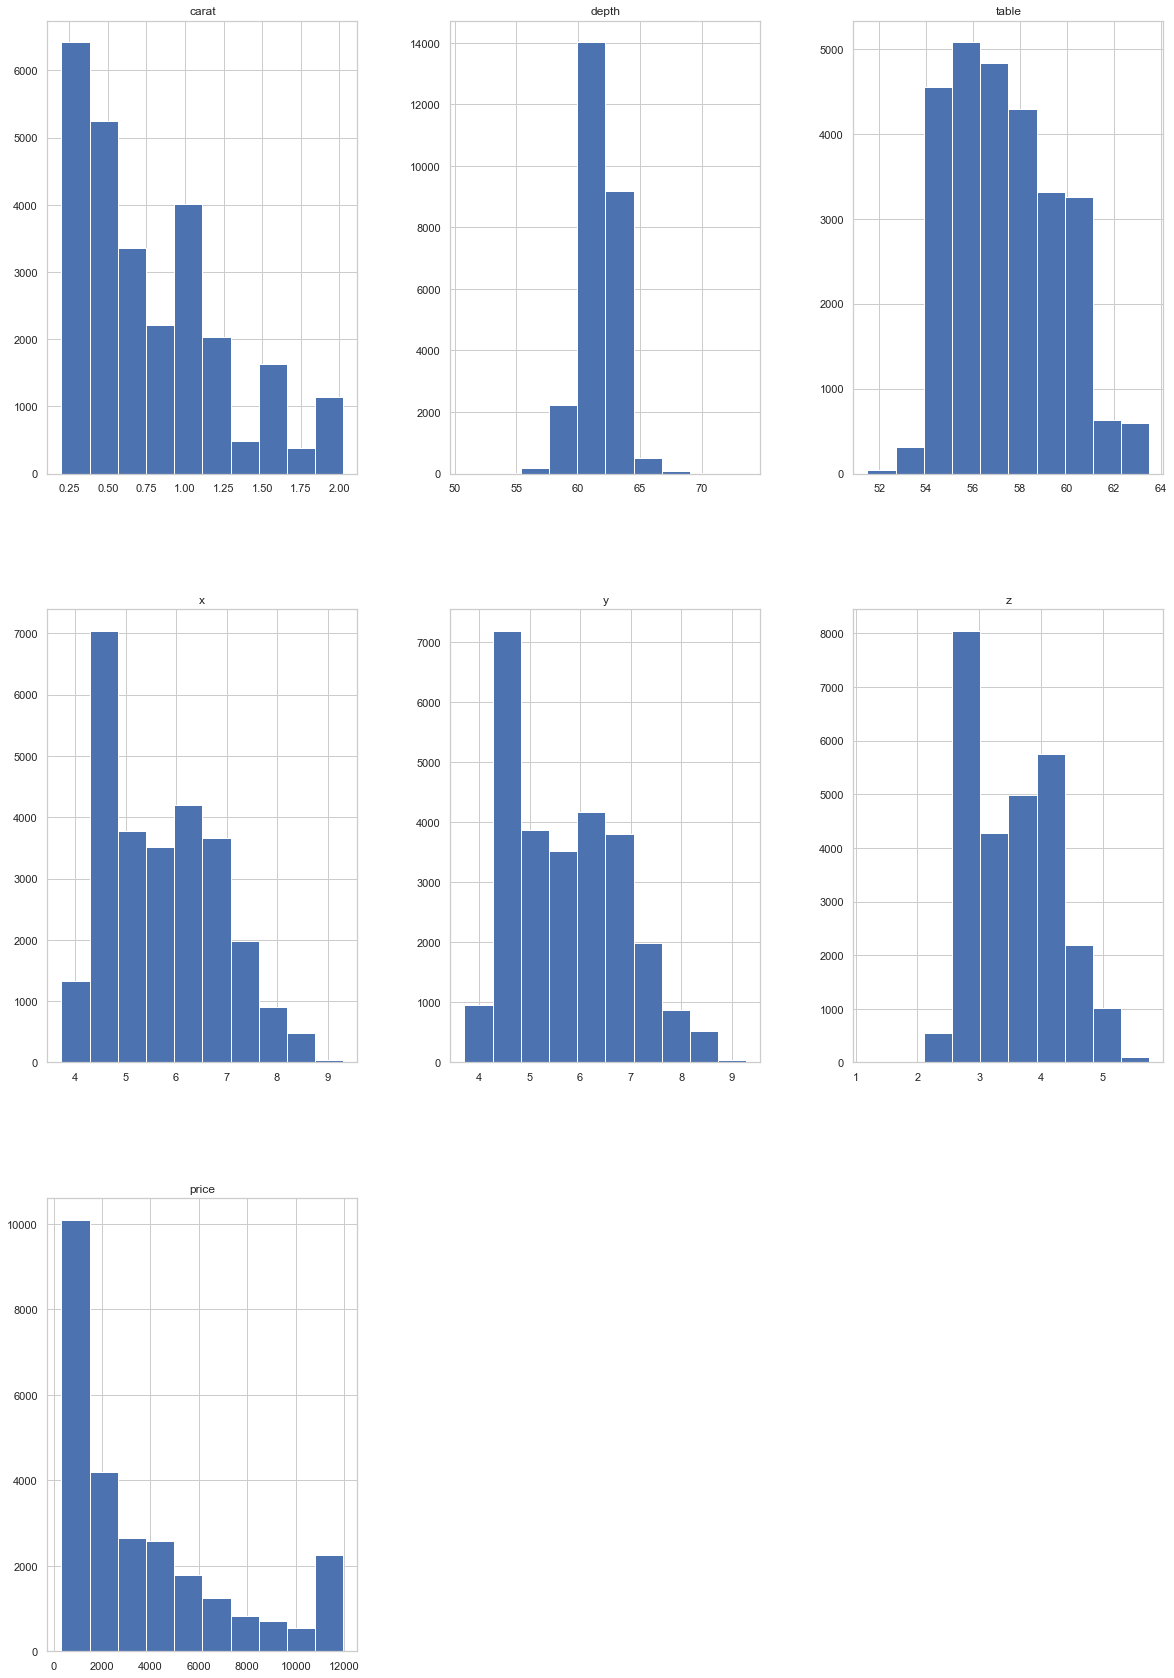

In [38]:
df.hist(figsize=(20,30));

In [39]:
df.skew()   # to measure the skeweness of every attribute.

carat    0.917214
depth   -0.025042
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

EDA-Step 5 : Bivariate Analysis.

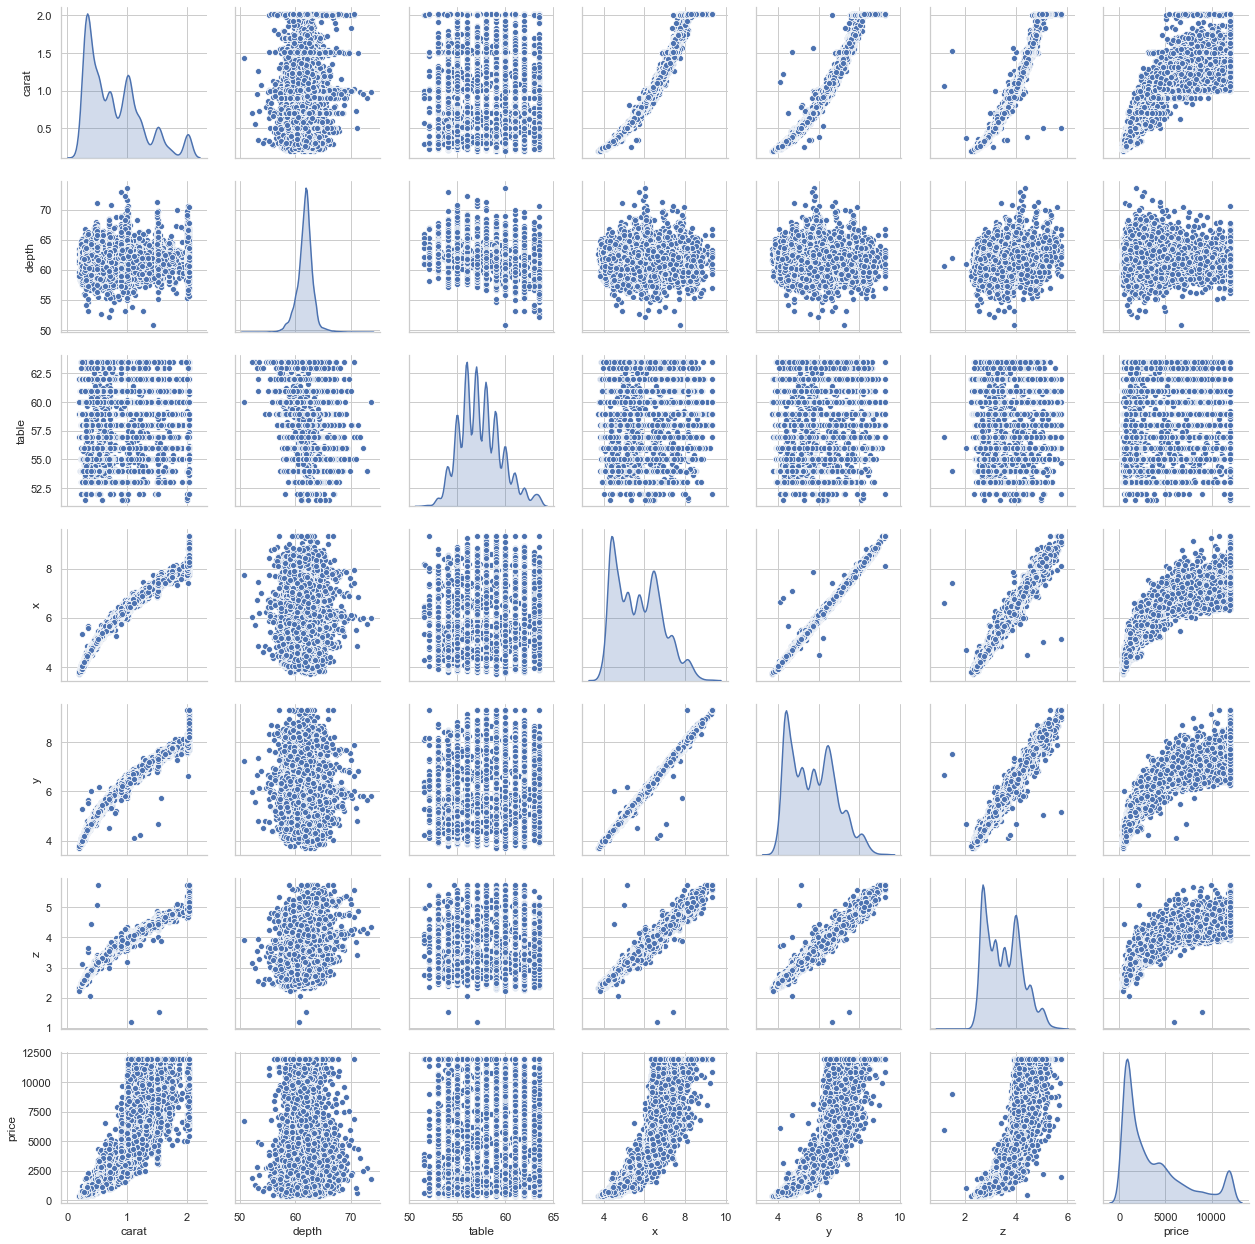

In [40]:
import seaborn as sns

df_attr = ( df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

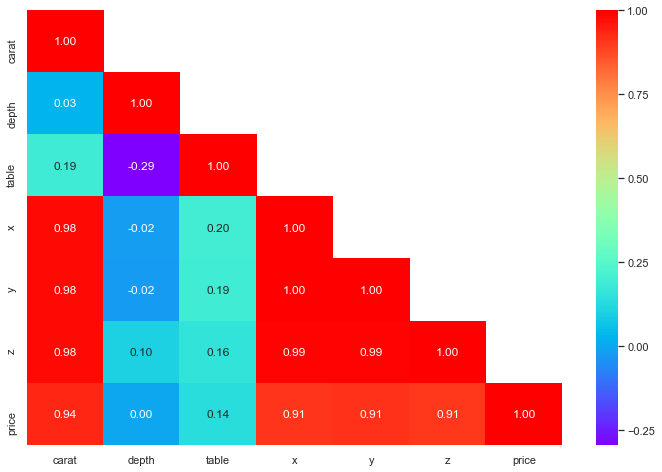

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

How each feature affects the price of diamonds.

In [43]:
correlations = df.corr()
correlations["price"].sort_values(ascending=False)



price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth    0.000313
Name: price, dtype: float64

Observation-5:
It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

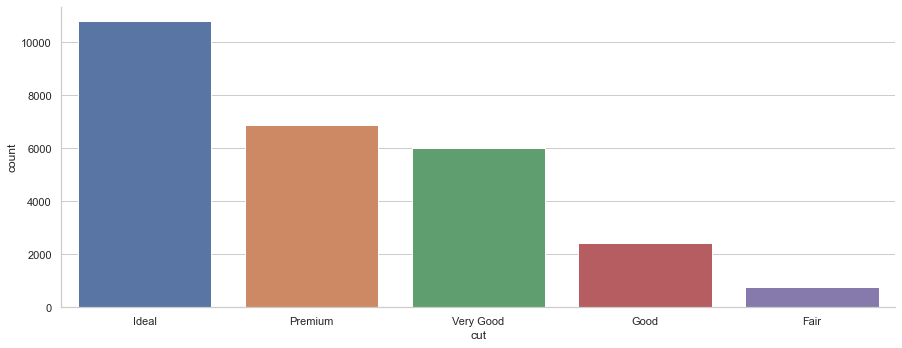

In [44]:
sns.catplot('cut', data=df, kind='count',aspect=2.5)

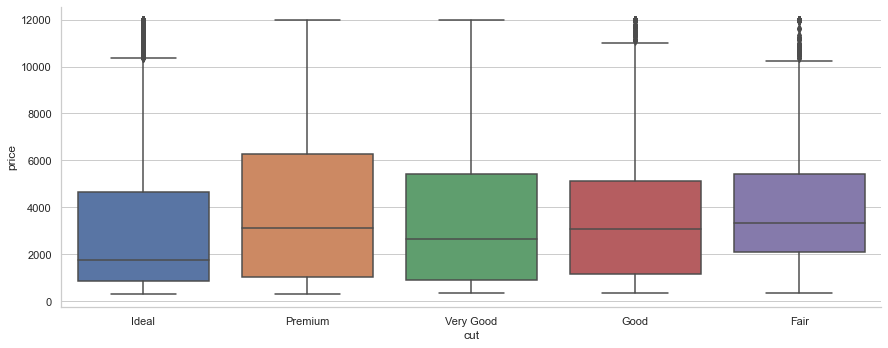

In [45]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

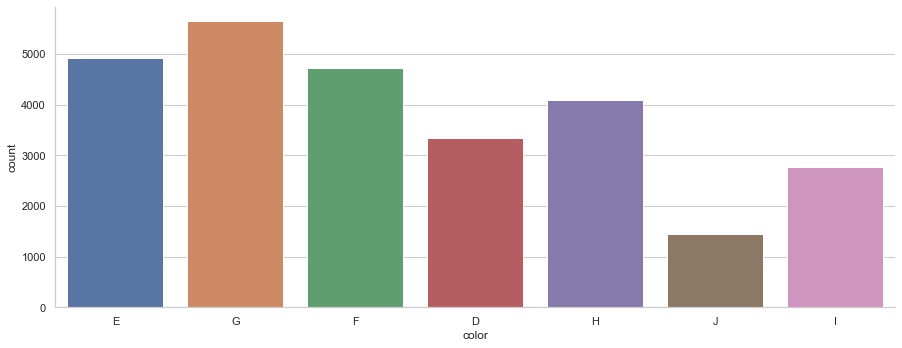

In [46]:
sns.catplot('color', kind='count', data=df, aspect=2.5)

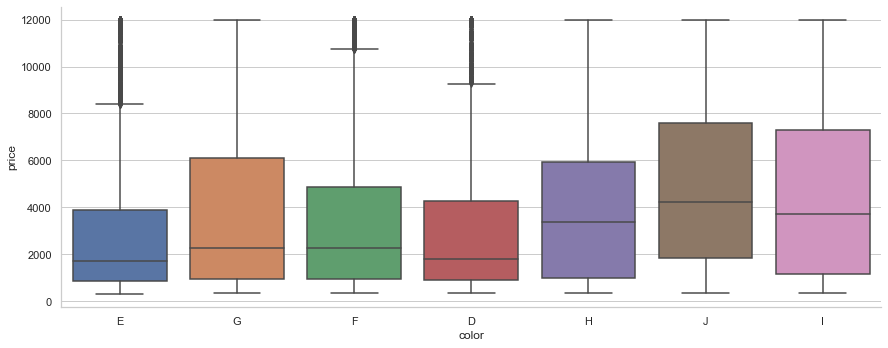

In [47]:
sns.catplot(x='color', y='price', data=df, aspect =2.5, kind='box')

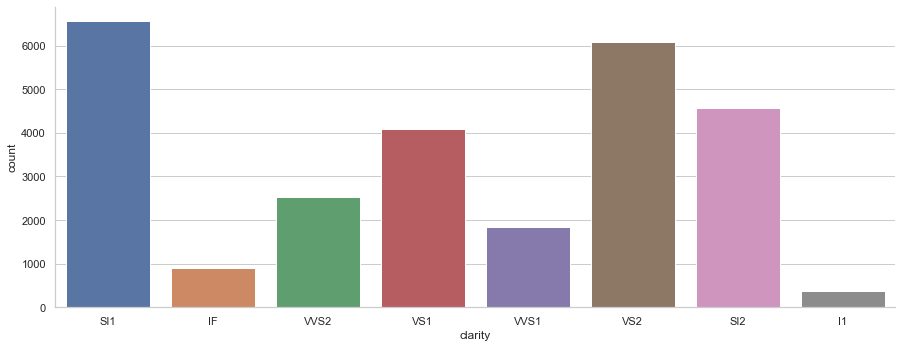

In [48]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=df, kind='count',aspect=2.5)

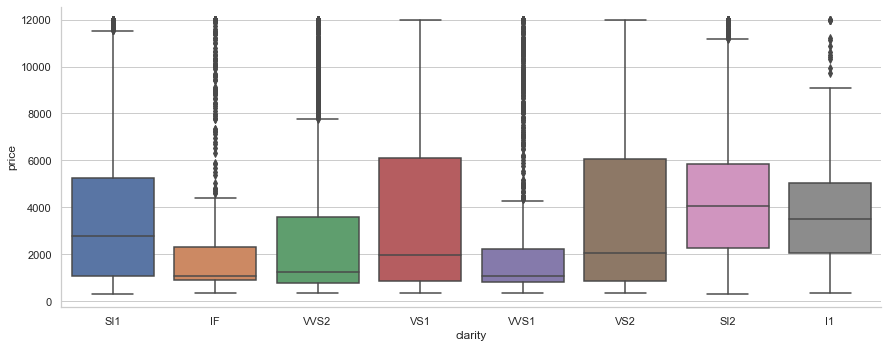

In [49]:
sns.catplot(x='clarity', y='price', data=df, aspect =2.5, kind='box')

# ANSWER 1.2

In [50]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [51]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

Imputing missing values

In [52]:
df = df.fillna(df.median())

In [53]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [54]:
df.shape 

(26925, 10)

No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.



# Answer 1.3

Encode the data (having string values)

Geting unique counts of all Objects.

In [55]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [56]:
#Converting objects to categorical codes
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [57]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [58]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [59]:
df.dtypes 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [60]:
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [61]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [62]:
df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


In [132]:
#Train-Test Split:
X = df.drop('price', axis=1)
y = df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [139]:
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [140]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8887.182245900443
The coefficient for cut is 113.33064005373353
The coefficient for color is 273.2259918127139
The coefficient for clarity is 436.8984753150905
The coefficient for depth is 35.446432597916335
The coefficient for table is -15.069203823159036
The coefficient for x is -1348.7213850676337
The coefficient for y is 1561.844340918257
The coefficient for z is -970.5030385552961


In [141]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5020.9688021732745


In [144]:
# R square on training data
regression_model.score(X_train, y_train)

0.9312287832968958

In [145]:
regression_model.score(X_test, y_test)

0.9316264205922415

In [148]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

906.8992122331998

In [149]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.2937284982526

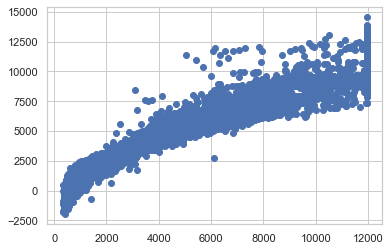

In [150]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

Observation-4:

we can see that this is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise is present on the data set i.e Unexplained variances on the output.

linkcode
Linear regression Performance Metrics:

intercept for the model: -3171.950447307667
R square on training data: 0.9311935886926559
R square on testing data: 0.931543712584074
RMSE on Training data: 907.1312415459143
RMSE on Testing data: 911.8447345328436
As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

In [151]:
# Applying zscore statsmodels
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [152]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [153]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1818110678016291
The coefficient for cut is 0.03645761671946332
The coefficient for color is 0.1346428271126061
The coefficient for clarity is 0.20831587059954507
The coefficient for depth is 0.012495815398862202
The coefficient for table is -0.009396637171998748
The coefficient for x is -0.4372590563807122
The coefficient for y is 0.5029014329313638
The coefficient for z is -0.19444498389036413


In [154]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7.256670475565814e-16


In [155]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9315877991921917

Observation-5:

Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

In [156]:
#Check Multi-collinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [157]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.81533420992797
cut ---> 10.301700261178272
color ---> 5.545655069061811
clarity ---> 5.459090831787078
depth ---> 1219.3088141451183
table ---> 874.1719859615408
x ---> 10678.52359972728
y ---> 9425.444226847116
z ---> 3317.944059606902


We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

# ANSWER 1.4

# Problem 2

In [83]:
df2=pd.read_csv('Holiday_Package.csv')

In [84]:
df2.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [85]:
df2.tail(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,863,no,66900,35,10,1,1,yes
863,864,no,35290,51,9,0,1,yes
864,865,no,25527,41,5,1,0,yes
865,866,yes,44057,35,9,0,2,yes
866,867,yes,22643,42,14,0,0,yes
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [94]:
df2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [95]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [97]:
df2.shape

(872, 7)

In [99]:
df2.duplicated().sum()

0

In [103]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [104]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [119]:

categorical = [var for var in df2.columns if df2[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['Holliday_Package', 'foreign']


In [121]:
df2['Holliday_Package'].unique()

array(['no', 'yes'], dtype=object)

In [122]:
df2['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [123]:
df2['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [125]:
df2.groupby('Holliday_Package').mean()

,Salary,age,educ,no_young_children,no_older_children
Holliday_Package,,,,,
no,48217.455945,40.853503,9.583864,0.0,0.902335
yes,42543.760599,38.900249,8.972569,0.0,1.072319


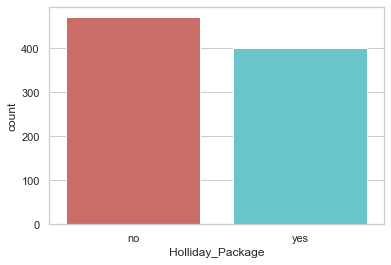

<Figure size 432x288 with 0 Axes>

In [126]:
sns.countplot(x='Holliday_Package',data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

In [127]:
df2.groupby('foreign').mean()

,Salary,age,educ,no_young_children,no_older_children
foreign,,,,,
no,47763.692073,40.603659,10.030488,0.0,0.966463
yes,39062.443287,37.986111,7.092593,0.0,1.023148


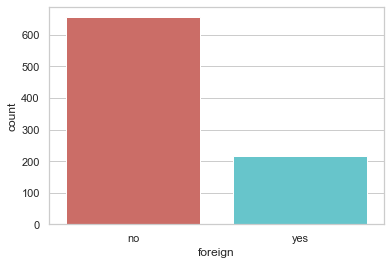

<Figure size 432x288 with 0 Axes>

In [128]:
sns.countplot(x='foreign',data=df2, palette='hls')
plt.show()
plt.savefig('count_plot')

In [130]:
df2.groupby('no_older_children').mean()

,Salary,age,educ,no_young_children
no_older_children,,,,
0.0,43710.353053,41.615776,9.536896,0.0
1.0,45589.256313,39.161616,8.792929,0.0
2.0,48291.643029,37.798077,9.456731,0.0
3.0,46788.000000,38.800000,8.709091,0.0
4.0,53717.535714,40.285714,10.285714,0.0
5.0,48895.250000,43.000000,8.250000,0.0


In [131]:
df2.groupby('no_young_children').mean()

,Salary,age,educ,no_older_children
no_young_children,,,,
0.0,45608.336869,39.955275,9.302752,0.980505


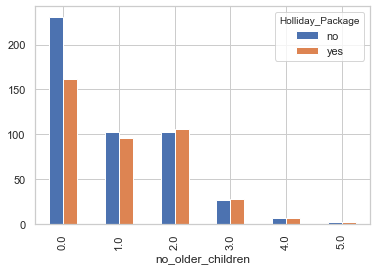

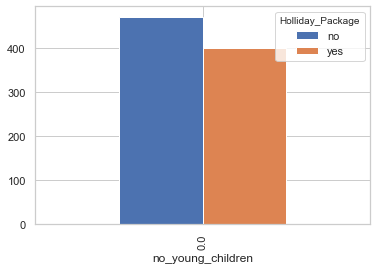

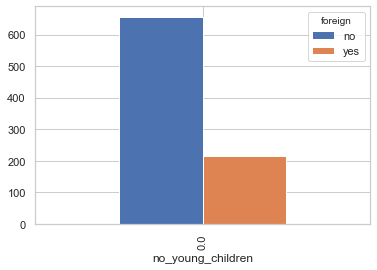

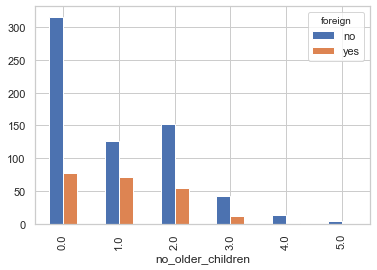

In [166]:
%matplotlib inline
pd.crosstab(df2.no_older_children,df2.Holliday_Package).plot(kind='bar')
pd.crosstab(df2.no_young_children,df2.Holliday_Package).plot(kind='bar')
pd.crosstab(df2.no_young_children,df2.foreign).plot(kind='bar')
pd.crosstab(df2.no_older_children,df2.foreign).plot(kind='bar')

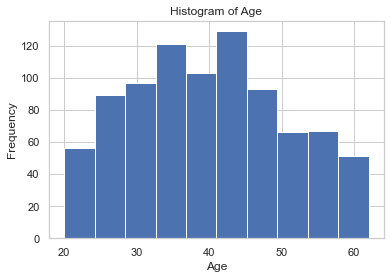

In [167]:
df2.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [168]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.0,872.000000
mean,45608.336869,39.955275,9.302752,0.0,0.980505
std,15699.745151,10.551675,3.014712,0.0,1.077197
min,8105.750000,20.000000,2.000000,0.0,0.000000
25%,35324.000000,32.000000,8.000000,0.0,0.000000
50%,41903.500000,39.000000,9.000000,0.0,1.000000
75%,53469.500000,48.000000,12.000000,0.0,2.000000
max,80687.750000,62.000000,18.000000,0.0,5.000000


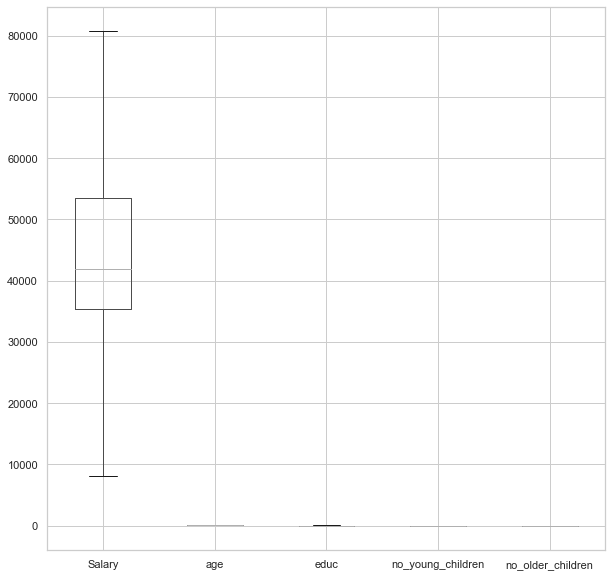

In [169]:
plt.figure(figsize=(10,10))
df2.boxplot()

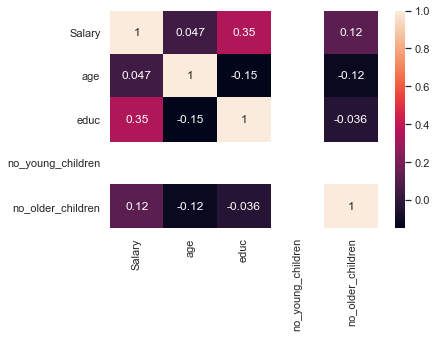

In [176]:
sns.heatmap(df2.corr(), annot=True)

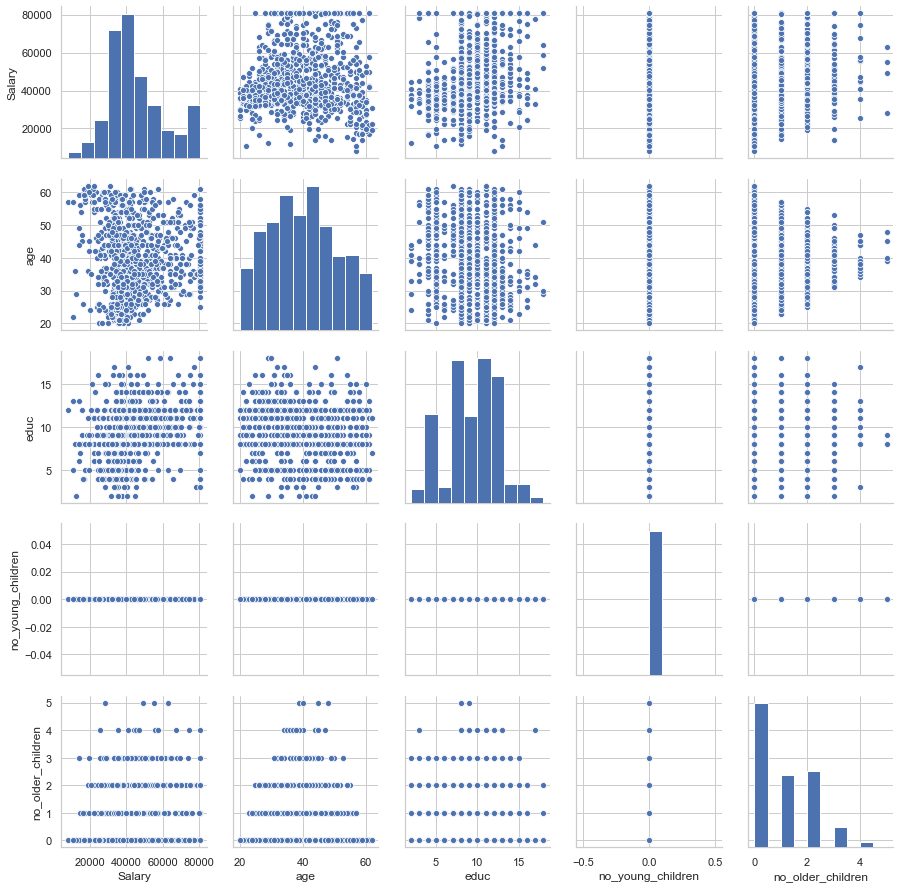

In [173]:
sns.pairplot(df2)

In [174]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column.upper(),': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [177]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes 

In [178]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [179]:
X = df2.drop(['Holliday_Package'],axis=1)

# Copy target into the y dataframe. 
y = df2.Holliday_Package

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [188]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg', verbose=True)

In [189]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [190]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.695362,0.304638
1,0.340526,0.659474
2,0.612071,0.387929
3,0.686392,0.313608
4,0.353342,0.646658


In [191]:
model.score(X_train, y_train)

0.6442622950819672

AUC: 0.667


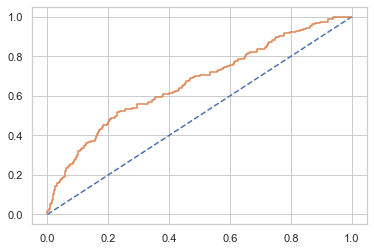

In [196]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [197]:
model.score(X_test, y_test)

0.6259541984732825

AUC: 0.667


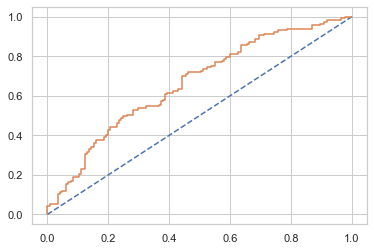

In [198]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [199]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [156, 128]])

In [ ]:
The result is being telling us that there are 252+163 correct predictions and 121+74 wrong predictions

In [200]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.68      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.63       610
weighted avg       0.65      0.64      0.63       610



In [201]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[112,  33],
       [ 65,  52]])

In [ ]:
The result is being telling us that we have 102+67 correct predictions and 50+43 incorrect predictions

In [202]:
test_acc=model.score(X_test,y_test)
test_acc

0.6259541984732825

In [203]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70       145
           1       0.61      0.44      0.51       117

    accuracy                           0.63       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.62      0.63      0.61       262



In [204]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
model1

LinearDiscriminantAnalysis()

In [205]:
pred_class = model1.predict(X_train)

In [206]:
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [207]:
confusion_matrix(y_train, pred_class)

array([[269,  57],
       [161, 123]])

In [208]:
model2=clf.fit(X_test,y_test)
model2

LinearDiscriminantAnalysis()

In [209]:
pred_class2 = model2.predict(X_test)
print(classification_report(y_test, pred_class2))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       145
           1       0.62      0.47      0.53       117

    accuracy                           0.63       262
   macro avg       0.63      0.62      0.62       262
weighted avg       0.63      0.63      0.62       262



In [210]:
confusion_matrix(y_test, pred_class2)

array([[111,  34],
       [ 62,  55]])